# PARKINSON'S DISEASE PREDICTION USING ANN
#### This is a classification type of problem in which we are going to predict if a patient is suffering from Parkinson's disease based on the audio/ voice measures. 
##### https://www.kaggle.com/datasets/dipayanbiswas/parkinsons-disease-speech-signal-features

In [1]:
# Loading the dependencis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('parkinsons.data')

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data.shape

(195, 24)

In [6]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### There are no null values in the dataframe.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## Attribute Information:

## Matrix column entries (attributes):
### name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [9]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
# The Status column is the target column.
data.status

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### The values  implies Health status of the subject (1) - Parkinson's, (0) - healthy

# VISUALIZATION

[]

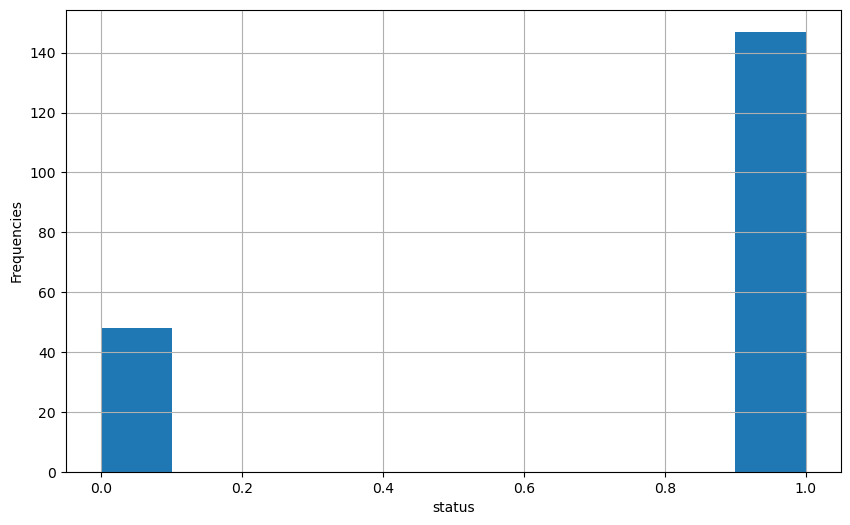

In [11]:
plt.figure(figsize=(10, 6))
data.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
# The dataset has high number of patients effected with Parkinson's disease.

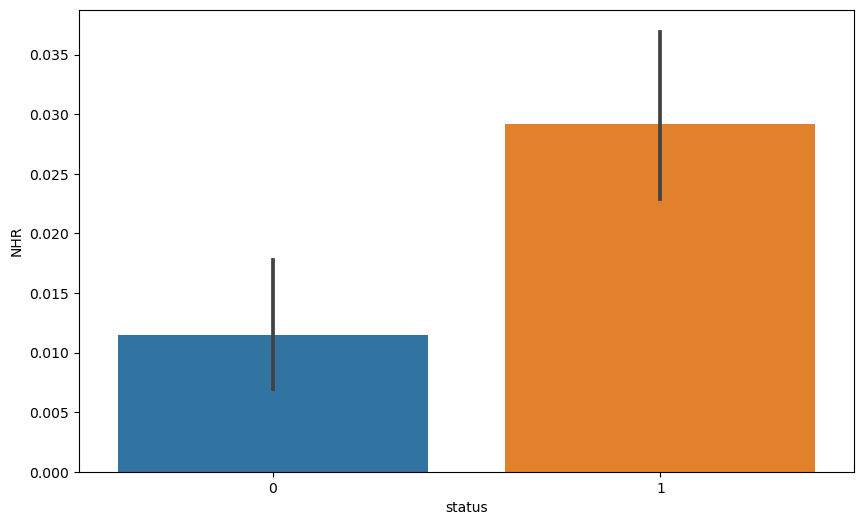

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=data);

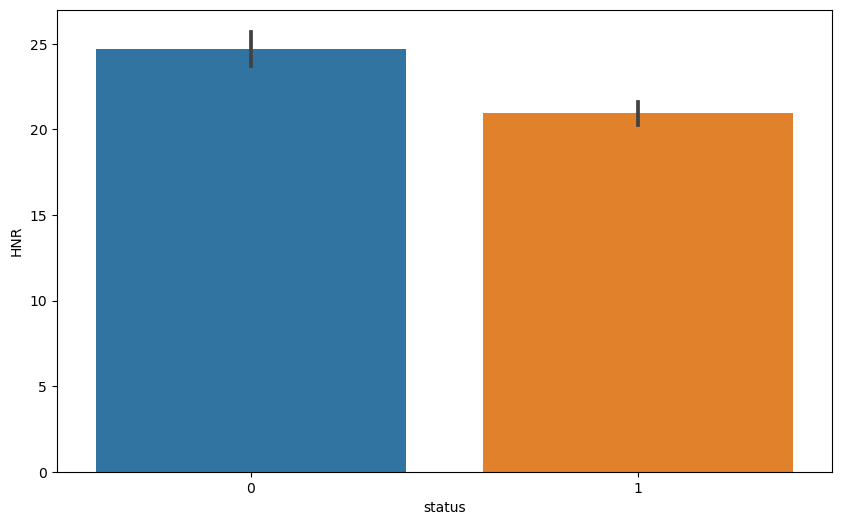

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=data);

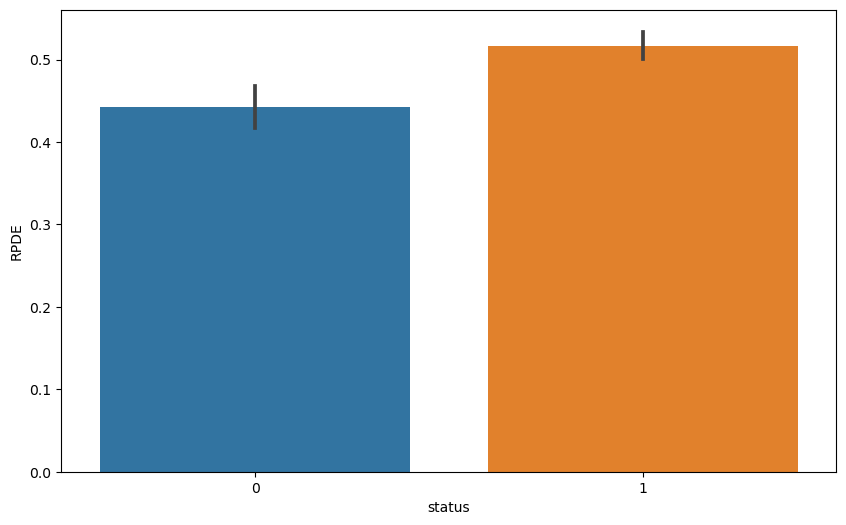

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=data);

### Distribution plot

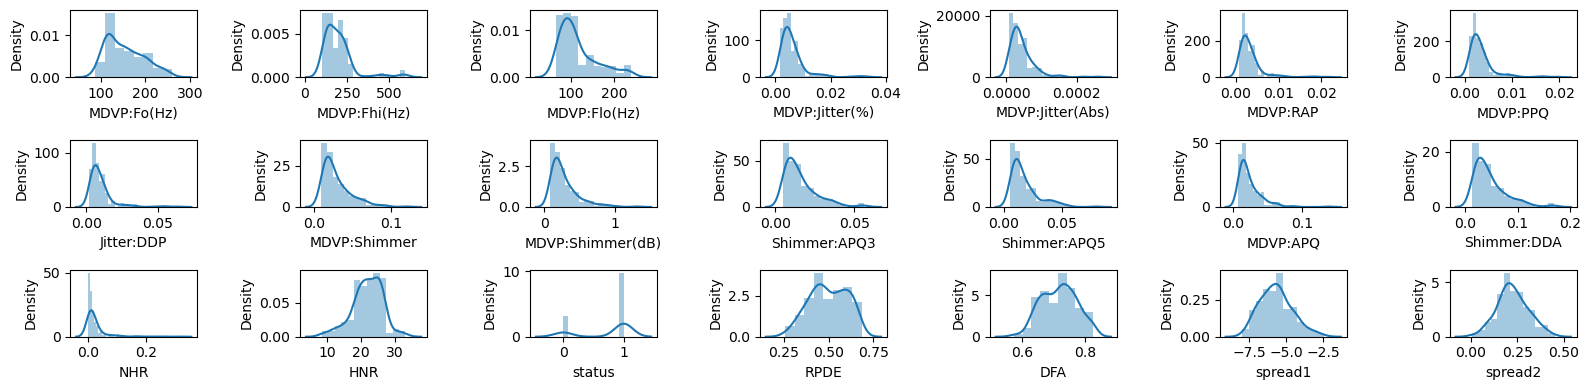

In [15]:
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=data.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [16]:
# Removing  name column as it is not having much importance.
data.drop(['name'],axis=1,inplace=True)

In [17]:
# Lets rearrange the columns:

In [18]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [19]:
# Lets rearrange the columns for convenience
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',  'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE','status']]

In [20]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [21]:
x = data.iloc[:, :-1].values
x.shape

(195, 22)

In [22]:
y = data.iloc[:, -1].values
y.shape

(195,)

### Splitting the data

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train.shape

(156, 22)

In [27]:
x_test.shape

(39, 22)

In [28]:
y_train.shape

(156,)

In [29]:
y_test.shape

(39,)

# MODEL BUILDING

#### Early stopping call backs

In [30]:
es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  patience=35,
                   restore_best_weights=True)

In [31]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01

In [32]:
tf.random.set_seed(42)
model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation = 'relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation = 'relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation = 'relu'),
    Dense(1, kernel_initializer='normal', activation = 'sigmoid')
])

In [33]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
             loss=tf.keras.losses.binary_crossentropy,
              metrics=[
                 tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall')],
    
             )

In [34]:
history = model.fit(x_train, y_train, batch_size=64,epochs=100,callbacks=[es], validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 275ms/step - loss: 0.5726 - accuracy: 0.6935 - precision: 0.7857 - recall: 0.8191 - val_loss: 0.4538 - val_accuracy: 0.7812 - val_precision: 0.7742 - val_recall: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.3885 - accuracy: 0.8226 - precision: 0.8214 - recall: 0.9787 - val_loss: 0.3056 - val_accuracy: 0.8438 - val_precision: 0.9524 - val_recall: 0.8333
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 0.3485 - accuracy: 0.8145 - precision: 0.9494 - recall: 0.7979 - val_loss: 0.5145 - val_accuracy: 0.8750 - val_precision: 0.8571 - val_recall: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2241 - accuracy: 0.8952 - precision: 0.9010 - recall: 0.9681 - val_loss: 0.5068 - val_accuracy: 0.8750 - val_precision: 0.8571 - val_recall: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2023 - accuracy: 0.9032 - precision: 

## Model evaluation

In [35]:
history_dict = history.history

In [36]:
acc = history_dict['accuracy']

In [37]:
epochs = range(1, len(acc)+1)

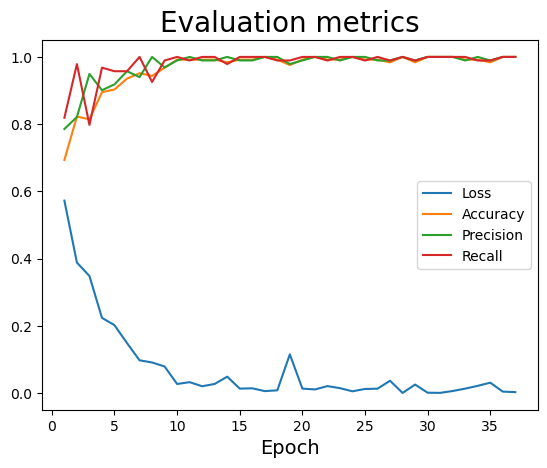

In [38]:
plt.plot(epochs, history.history['loss'], label = 'Loss')
plt.plot(epochs, history.history['accuracy'], label = 'Accuracy')
plt.plot(epochs, history.history['precision'], label = 'Precision')
plt.plot(epochs, history.history['recall'], label = 'Recall')
plt.title('Evaluation metrics', size = 20)
plt.xlabel('Epoch', size=14)
plt.legend();

#### Predictions

In [39]:
pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [40]:
pred

array([[0.62344587],
       [0.20078115],
       [0.07117668],
       [0.29901114],
       [0.47119424],
       [0.99999994],
       [0.4157822 ],
       [0.5396408 ],
       [0.9281844 ],
       [1.        ],
       [0.395888  ],
       [1.        ],
       [0.884642  ],
       [0.9962259 ],
       [0.10588365],
       [0.717926  ],
       [0.85581625],
       [0.14994046],
       [0.07244227],
       [1.        ],
       [0.9999952 ],
       [0.42680073],
       [0.9999998 ],
       [0.9999999 ],
       [0.07384343],
       [0.9999883 ],
       [0.75024873],
       [0.07175137],
       [0.43363255],
       [0.08035704],
       [0.99999225],
       [0.99911845],
       [0.9934789 ],
       [0.4032904 ],
       [1.        ],
       [0.9999973 ],
       [0.32021132],
       [0.16875575],
       [0.9999652 ]], dtype=float32)

In [41]:
pred_class = [1 if prob>0.5 else 0 for prob in np.ravel(pred)]

#### Confusion Matrix

In [42]:
Matrix = confusion_matrix(y_test, pred_class)

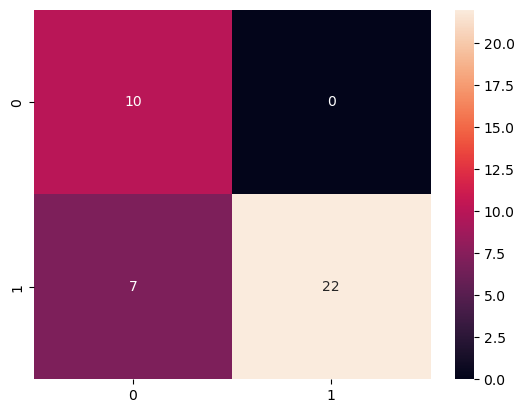

In [43]:
sns.heatmap(Matrix, annot=True);

In [44]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.76      0.86        29

    accuracy                           0.82        39
   macro avg       0.79      0.88      0.80        39
weighted avg       0.89      0.82      0.83        39

